In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit, differential_evolution
import csv
from data_read import data_read
from rebinning import rebinning
from fit import fit
from get_rates import get_rates
from get_bkg import get_bkg

In [2]:
file_name = './Data/Gamma data/Ventana temporal/nacc.mca'

In [3]:
Nch = 8192

ch, rate, srate = get_rates(file_name)
rate_bkg, srate_bkg = get_bkg()


In [4]:
# plt.scatter(ch, rate, marker='+', c="black")
# plt.show()
# plt.scatter(ch, rate_bkg, marker='+', c="black")
# plt.show()
# plt.scatter(ch, rate, marker='+', c="black")
# plt.show()
# plt.scatter(ch, rate-rate_bkg, marker='+', c="black")
# plt.show()

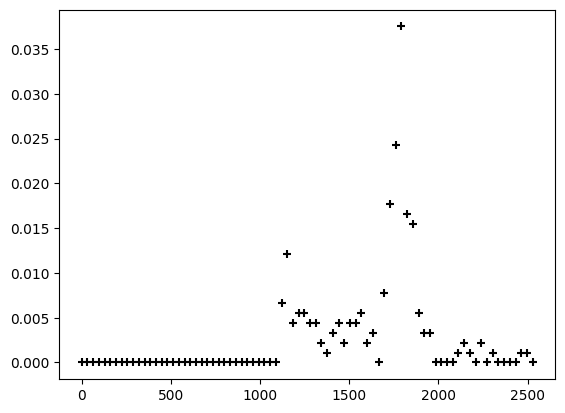

In [8]:
real_rate = rate - rate_bkg
sreal_rate = np.sqrt(srate**2+srate_bkg**2)


limMax = 80
limMin = 0
x = ch[limMin:limMax]
y = rate[limMin:limMax]
sy = srate[limMin:limMax]
plt.scatter(x, y, marker='+', c="black")
# plt.errorbar(x, y, yerr=sy,fmt='+',c="black")
plt.show()

In [6]:
def func(x,*p):
    return (p[0] + p[1]*x + p[2]*(x**2) + p[3]*np.exp(-(1/2)*((x-p[4])/p[5])**2))
    

In [7]:
res_param, res_xi2, res_cov = fit(x,y,sy,func,[0,1,1,0.0150,1800,5])

C:\Users\fredi\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minpack_py.py:931: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
C:\Users\fredi\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\fredi\OneDrive\Escritorio\TEIV\Nuclear\fit.py:9: RuntimeWarning: divide by zero encountered in divide
  return (1/(N-m))*sum((y-func(x,*param))**2/(sy**2))


In [8]:
print(res_param)
print(res_xi2)

[0.0e+00 1.0e+00 1.0e+00 1.5e-02 1.8e+03 5.0e+00]
inf


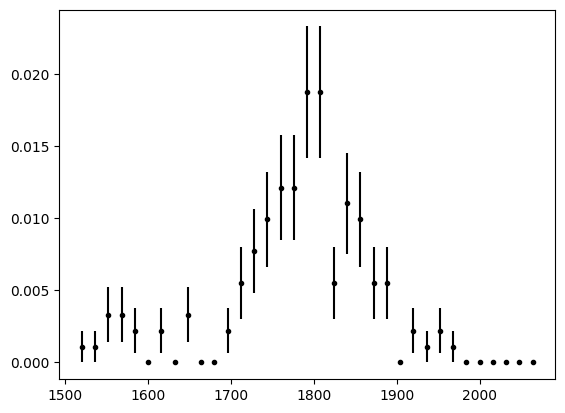

In [10]:
# plt.scatter(x, y, marker='+', c="black", label='Data')

plt.errorbar(x, y, yerr=sy,fmt='.',c="black")
#plt.scatter(x, y, marker='.', c="blue", label='Data')
#plt.plot(x, func(x,*res_param), 'r-', label='Fit')
plt.show()

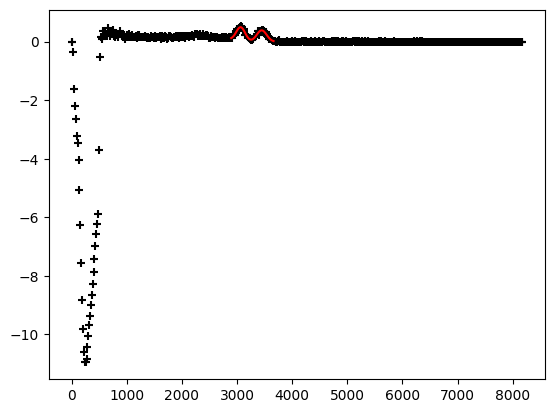

In [10]:
plt.scatter(ch, real_rate, marker='+', c="black", label='Data')
plt.plot(x, func(x,*res_param), 'r-', label='Fit')
plt.show()